<h1> Proyecto 01 </h1>

Machine Learning / Uniquindio 2024 - I /
Docente: Jonnatan Arias Garcia


1. Elija minimo 1 de los siguientes proyectos
El objetivo es aplicar los conocimientos vistos en la asignatura con respecto a los modelos regresión.


2. La idea central es que analice los datos, haga los ajustes necesarios y posteriormente ejecute diferentes modelos de regresión sobre los datos procesados.


3. Finalmente, discuta los resutaldos obtenidos, tanto en el area de ingenieria (modelos, errores, metricas y demas) como en el area de aplicación dada por cada proyecto/base de datos.


#Idea de Proyecto 1 - Baloto (Procesamiento de datos - ingeniero de datos 1)

Baloto
y/o Baloto revancha

ELIGE 5 NÚMEROS DEL 1 AL 43 SIN REPETIR
Y UNA SUPERBALOTA DEL 1 AL 16
La idea es crear un predictor del baloto.


Puntos a tener en cuenta:

*   Vamos a predecir la superbalota o una distribucion para cada balota? (salida objetivo)
*   Como van a entrar los datos? todos como una matriz o un predictor por cada columna? (Entrada de datos al modelo)
*   Finalmente, pruebe varios modelos y discuta. tanto como uso los datos, como propueso las salidas, porque lo planteo asi
*   Saque conclusiones sobre el resultado



## Descarga de datos
historico 04/22/2017 a 02/25/2023

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import io
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'baloto-colombia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1991448%2F5084615%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240307%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240307T185045Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da8716be2bd47dffb65d3d86a5f4a57ebfae9384acddbb19d735b391efba25e3c990a6217a71cfd8cdbfb9e070fa48a79eb2b75cff9046d4c84ad77c0a3c4c5f5aeb973584736f6a0ef7a6a8f392bd1897084ba8cd0d6206c48f7d9bbc28948b0a56f083d3a9c96aaf3751068365d1013b3ece04929b498e18254e10d1504320d8adf3c1182b056a4e7a1ba1e4dd73104bad92cc7e5128b9af419e89f66900a253a16e74bebd68b702b0bb392b862b40bdbd3f93439e800d4de595a8191e737ecb0b735dafdaa06d87493d264c61f1c821635916f45990de07db97341e4b1831fb427b2550b8bc46b2cdb77e22942d33ad166becef458de6849ee8a7301dfefab'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10699 bytes downloaded
Downloaded and uncompressed: baloto-colombia
Data source import complete.


SI LA DESCARGA FALLA , ACTUALIZAR EL BLOQUE ANTERIOR CON EL BLOQUE SIMILAR QUE APARECE EN:

https://www.kaggle.com/code/jaforero/baloto-etl/notebook


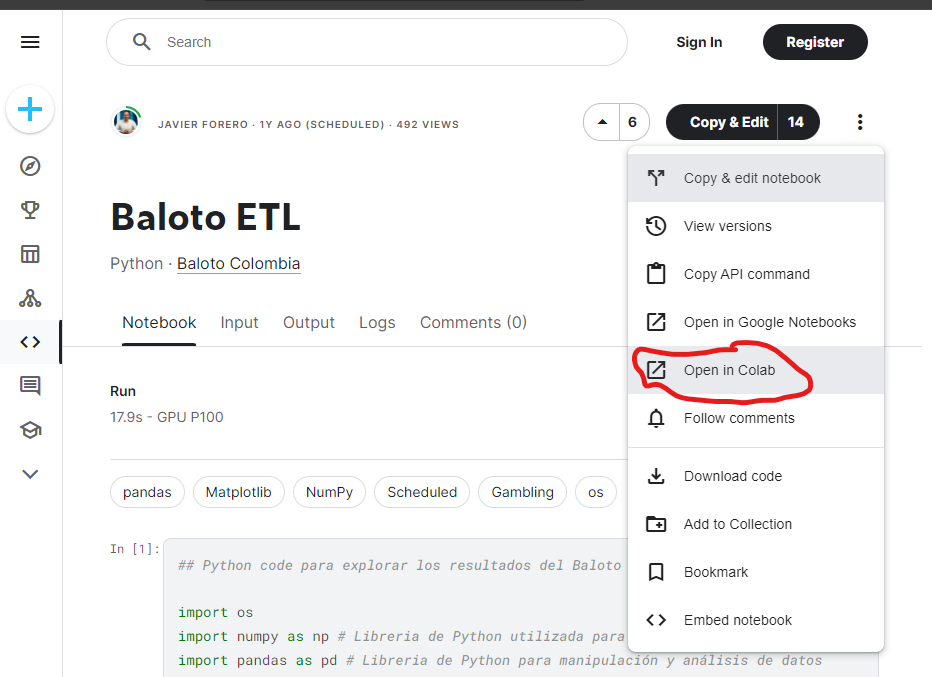

## Carga de datos y ploteo

/kaggle/input/baloto-colombia/baloto.csv
/kaggle/input/baloto-colombia/revancha.csv
           C1  C2  C3  C4  C5  SB
Date                             
4/22/2017  15  28  36  37  41  10
4/26/2017   1   2  25  31  33  14
4/29/2017   6  19  25  28  36   1
5/3/2017    5   6   7  12  37   6
5/6/2017    1  20  36  39  43  10
...        ..  ..  ..  ..  ..  ..
2/11/2023   8  11  17  29  42  13
2/15/2023  22  35  25   7  15   9
2/18/2023   7  20  30  38  25   4
2/22/2023  13  14   6   8  22  12
2/25/2023  32  35  14  20  12   9

[600 rows x 6 columns]


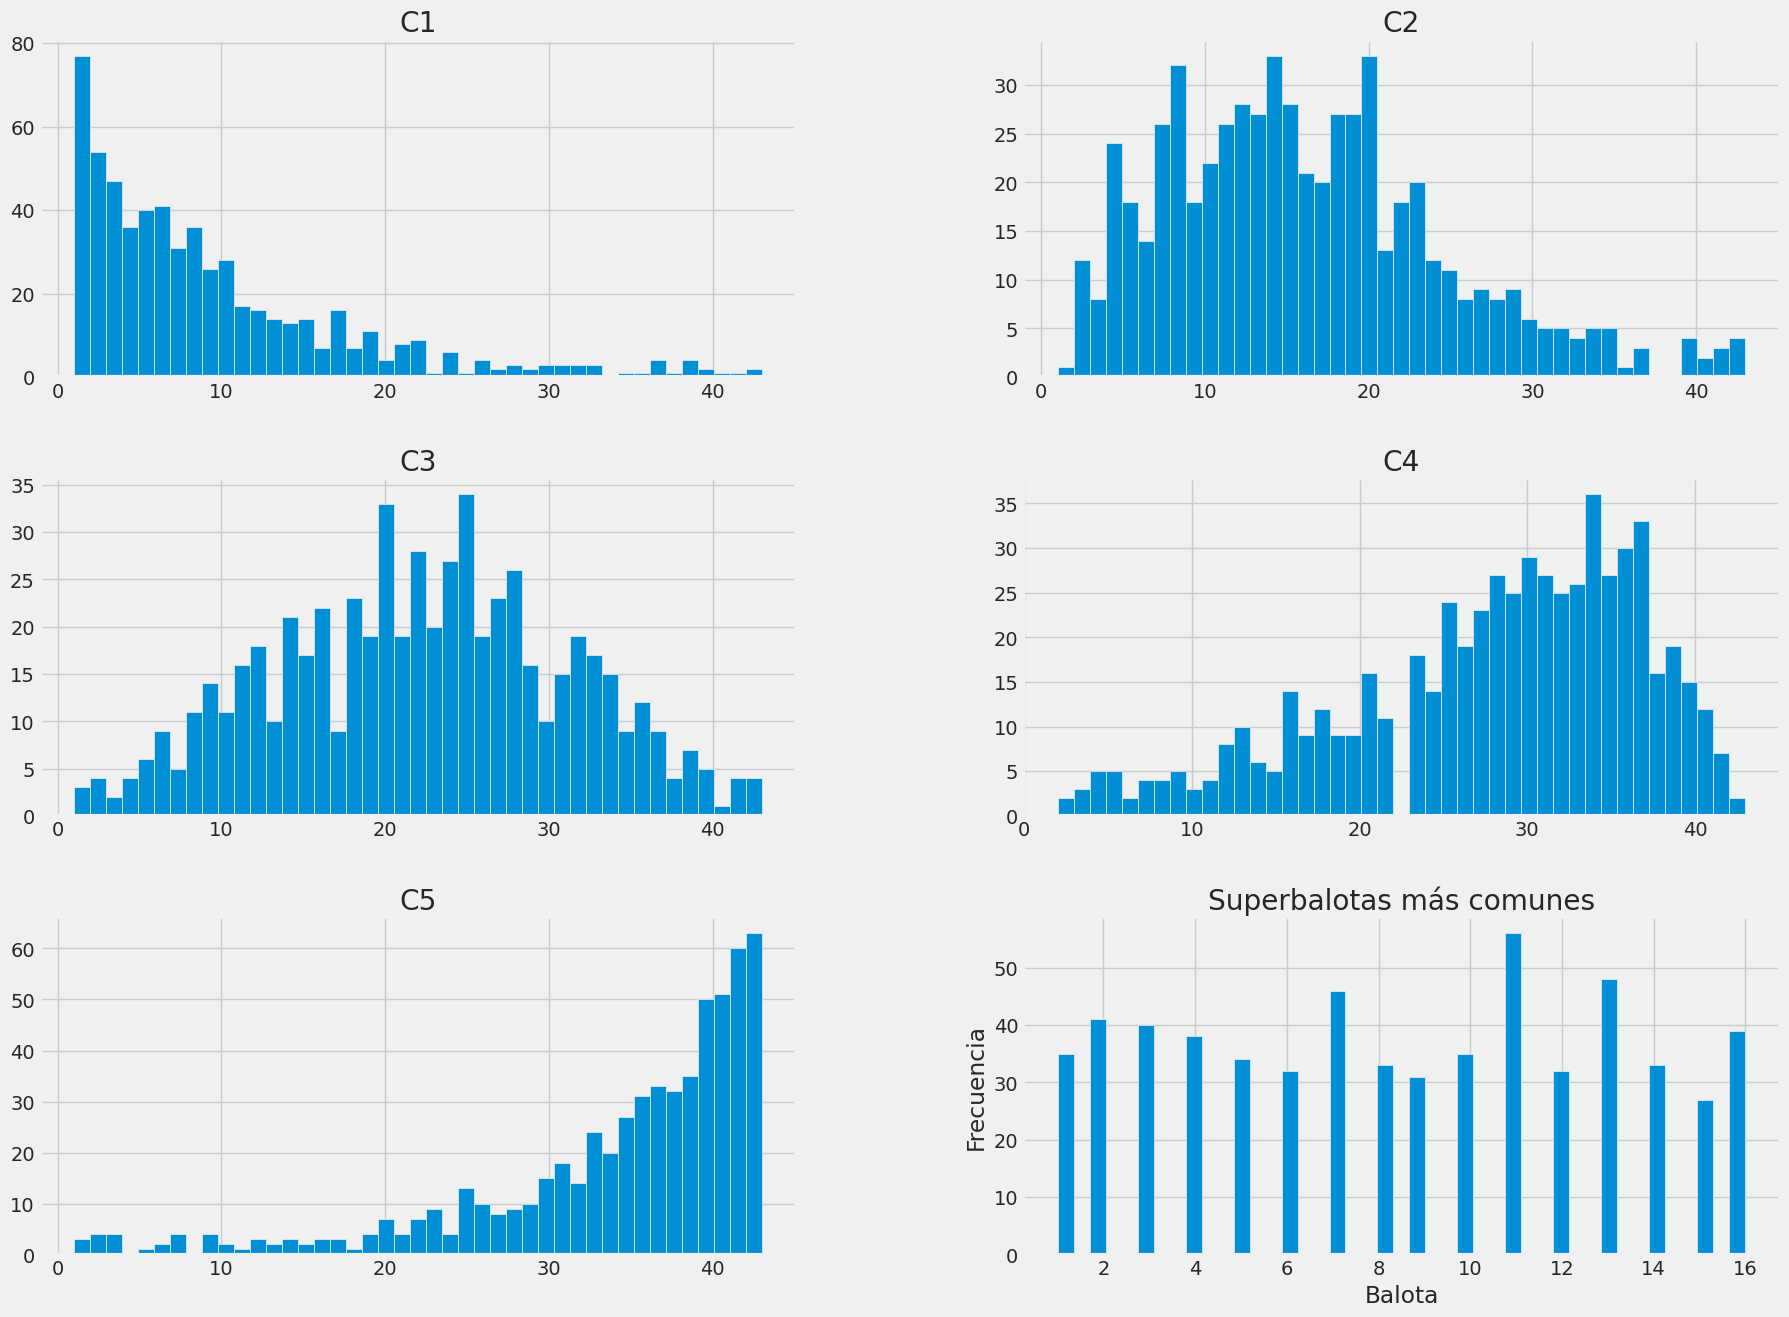

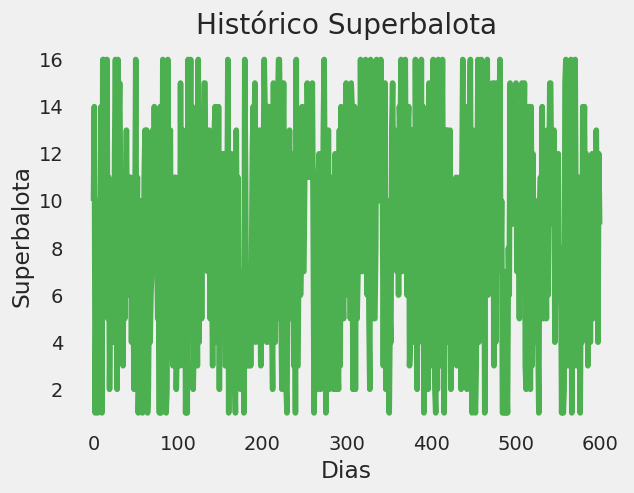

In [ ]:
import os
import numpy as np # Libreria de Python utilizada para trabajar con matrices
import pandas as pd # Libreria de Python para manipulación y análisis de datos
import matplotlib.pyplot as plt # Libreria completa para crear visualizaciones estáticas, animadas e interactivas en Python

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cargando los datos del baloto
data = pd.read_csv('/kaggle/input/baloto-colombia/baloto.csv', index_col = 'Date')
# Vista inicial de los datos
print(data)

# Creando combinación de balotas
balotas = data.iloc[:, 1:6].values
superbalota = data.iloc[:, -1].values

# Histograma de cada una de las balotas
data.hist(bins=43, figsize=(20,15))
plt.title("Superbalotas más comunes")
plt.xlabel("Balota")
plt.ylabel("Frecuencia")
plt.show()

# Graficando la superbalota historicamente
plt.plot(range(len(superbalota)), superbalota, c = '#4CAF50')
plt.title("Histórico Superbalota")
plt.xlabel("Dias")
plt.ylabel("Superbalota")
plt.grid()
plt.show()

In [ ]:
X = np.array(data)[:,:-1]
Ysuperbalota = np.array(data)[:,-1]
print(X.shape,Ysuperbalota.shape)

(600, 5) (600,)


# Idea de Proyecto 2 - Predicción de precio para vuelos (Análisis y procesamiento de datos - Ingeniero de datos 2)

Son vuelos de estados unidos, en los cuales tenemos 12 columnas numericas y no numericas, ademas con errores en la digitación

* Queremos predecir el precio según las otras caracteristicas.
* Las columnas iniciales son:
Unnamed: 0	airline	flight	source_city	departure_time	stops	arrival_time	destination_city	class	duration	days_left	price
* Las etiquetas se transformaron a Valores numericos, investiga como se hizo y porque?
* Se aplico un preprocesamiento para quitar datos mal digitados y columnas innecesarias, puedes decirnos como se hizo?
* Finalmente se llego a una matriz df con 297817 rows × 10 columns, puedes decirnos cuantos datos se eliminaron de los datos iniciales y porque se llego a este numero de datos?
* Analice como viene la data y que parametros tiene, pruebe varios modelos y discuta.
* Es importaten resaltar que se deben separar los datos en 80% de entrenamiento 20% de test (puedes usar train_test_split de sklearn)
* Saque conclusiones sobre el resultado de los diferentes modelos.


## Descarga de datos
historico 04/22/2017 a 02/25/2023

In [ ]:
import io
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import pandas as pd

DESCARGAR EL ARCHIVO DEL SIGUIENTE ENLACE O DE CLASSROOM (Clean_Dataset.csv), Y SUBIRLO EN EL SIGUIENTE BLOQUE DE CÓDIGO(Elegir archivos y esperar que suba 100%)

https://drive.google.com/file/d/1kocJE6oDLstyn620CATVcGFp-lQHcege/view?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clean_Dataset.csv to Clean_Dataset (1).csv


##Carga de datos y ploteo

OJO, Si en la linea siguiente:

 df = pd.read_csv(io.StringIO(uploaded['Clean_Dataset.csv'].decode('utf-8')))

 genera error por el nombre, debes cambiar Clean_Dataset.csv por el nombre como quedo guardado. (se puede ver en la barra de la izquierda de google.colab en el icono de la carpeta)

Posiblemente el nuevo nombre sea algo como Clean_Datase (1).csv o asi.

tambien se puede ver en el resultado de la linea de upload.

 Clean_Dataset.csv(text/csv) - 24683279 bytes, last modified: 7/3/2024 - 100% done
Saving Clean_Dataset.csv to Clean_Dataset (1).csv

In [ ]:
# read the data
df = pd.read_csv(io.StringIO(uploaded['Clean_Dataset (1).csv'].decode('utf-8')))
# df=pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
# print the shape of data
print("Cantidad de datos:",df.shape)

Cantidad de datos: (300153, 12)


In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

<Axes: >

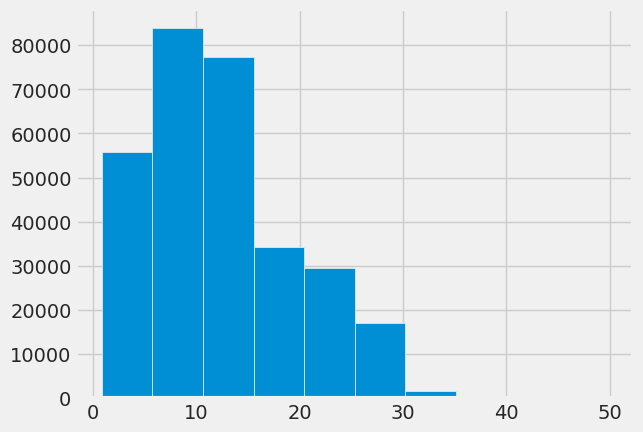

In [ ]:
# plot the distribution of column  duration
df['duration'].hist()

<Axes: >

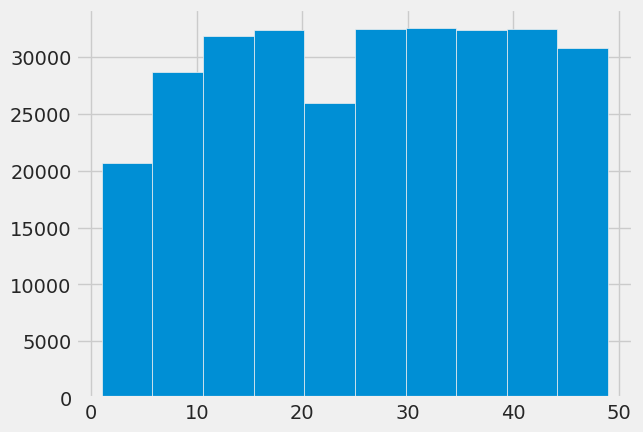

In [ ]:
# plot the distribution of column  days_left
df['days_left'].hist()

## Preprocesando los datos
Quitamos outliers y repetidos

In [ ]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

index_list = []
index_list.extend(outliers(df,'duration'))

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df = remove(df,index_list)
print("nuevas dimensiones de la data: ",df.shape)

nuevas dimensiones de la data:  (298043, 12)


In [ ]:
## Convertimos variables texto a variables numericas con sklearn.preprocessing.LabelEncoder

df['airline'].unique()
airline_count=df['airline'].value_counts().reset_index()

df['flight'].nunique()

df['source_city'].nunique()
source_city_count=df['source_city'].value_counts().reset_index()

df['departure_time'].unique()
departure_time_count=df['departure_time'].value_counts().reset_index()

df['stops'].unique()
stops_count=df['stops'].value_counts().reset_index()

df['arrival_time'].unique()
arrival_time_count=df['arrival_time'].value_counts().reset_index()

df['destination_city'].unique()
destination_city_count=df['destination_city'].value_counts().reset_index()

df['class'].unique()
class_count=df['class'].value_counts().reset_index()

In [ ]:
# el numero de vuelo es irrelevante, por ende lo quitamos
df.drop('flight',axis=1,inplace=True)

#quitamos la columna unnamed
df.drop("Unnamed: 0",axis=1,inplace =True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

df[column] = df[column].apply(LabelEncoder().fit_transform)

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


# Idea de proyecto 3 - Predicción de falla del corazón (Discusión de data - Analista de datos)

Vamos a calcular la probabilidad de death
* Analice los datos que tenemos en la tabla y junto con la correlation matrix diganos que variables estan mas relacionadas con la enfermedad y probabilidad de muerte.
* Si existe alguna caracteristica que no vea reelevante es libre de procesar los datos previos a enviarlos al predictor, pero diganos por que cree que esto es asi.
* no olvide dividir los datos para entrenamiento 80% y 20% test  (puedes usar train_test_split de sklearn)
* Implemente y pruebe diferentes modelos y discuta los resultados de error de cada uno.
* Saque sus propias conclusiones sobre los resultados y discuta.



##Descarga de datos

In [ ]:
import io
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import pandas as pd
import matplotlib.pyplot as plt


DESCARGAR EL ARCHIVO DEL SIGUIENTE ENLACE O DE CLASSROOM (heart_failure_clinical_records_dataset.csv), Y SUBIRLO EN EL SIGUIENTE BLOQUE DE CÓDIGO(Elegir archivos y esperar que suba 100%)

https://drive.google.com/file/d/1lzD3KBkd6f18O6Gr7GiIsHh5bDjD4FwW/view?usp=sharing



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


 <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1>

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart.

## Carga de datos

OJO, Si en la linea siguiente:

 df = pd.read_csv(io.StringIO(uploaded['heart_failure_clinical_records_dataset.csv'].decode('utf-8')))

 genera error por el nombre, debes cambiar Clean_Dataset.csv por el nombre como quedo guardado. (se puede ver en la barra de la izquierda de google.colab en el icono de la carpeta)

Posiblemente el nuevo nombre sea algo como heart_failure_clinical_records_dataset (1).csv o asi.

tambien se puede ver en el resultado de la linea de upload.

 Clean_Dataset.csv(text/csv) - 24683279 bytes, last modified: 7/3/2024 - 100% done
Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv

In [ ]:
#loading data
data = pd.read_csv(io.StringIO(uploaded['heart_failure_clinical_records_dataset.csv'].decode('utf-8')))
# data = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-53-8bd160cc720f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

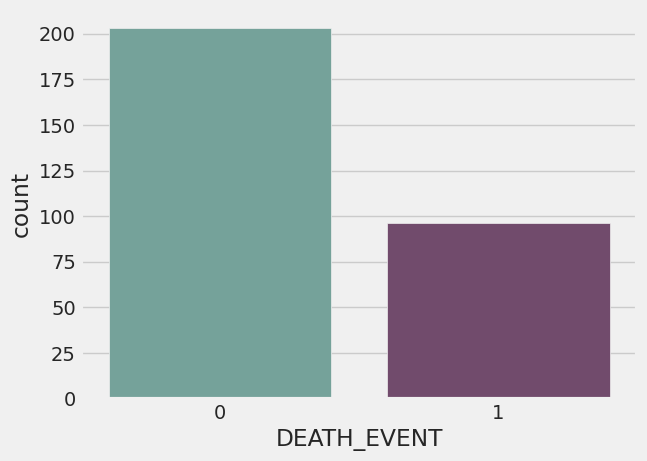

In [ ]:
import seaborn as sns
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

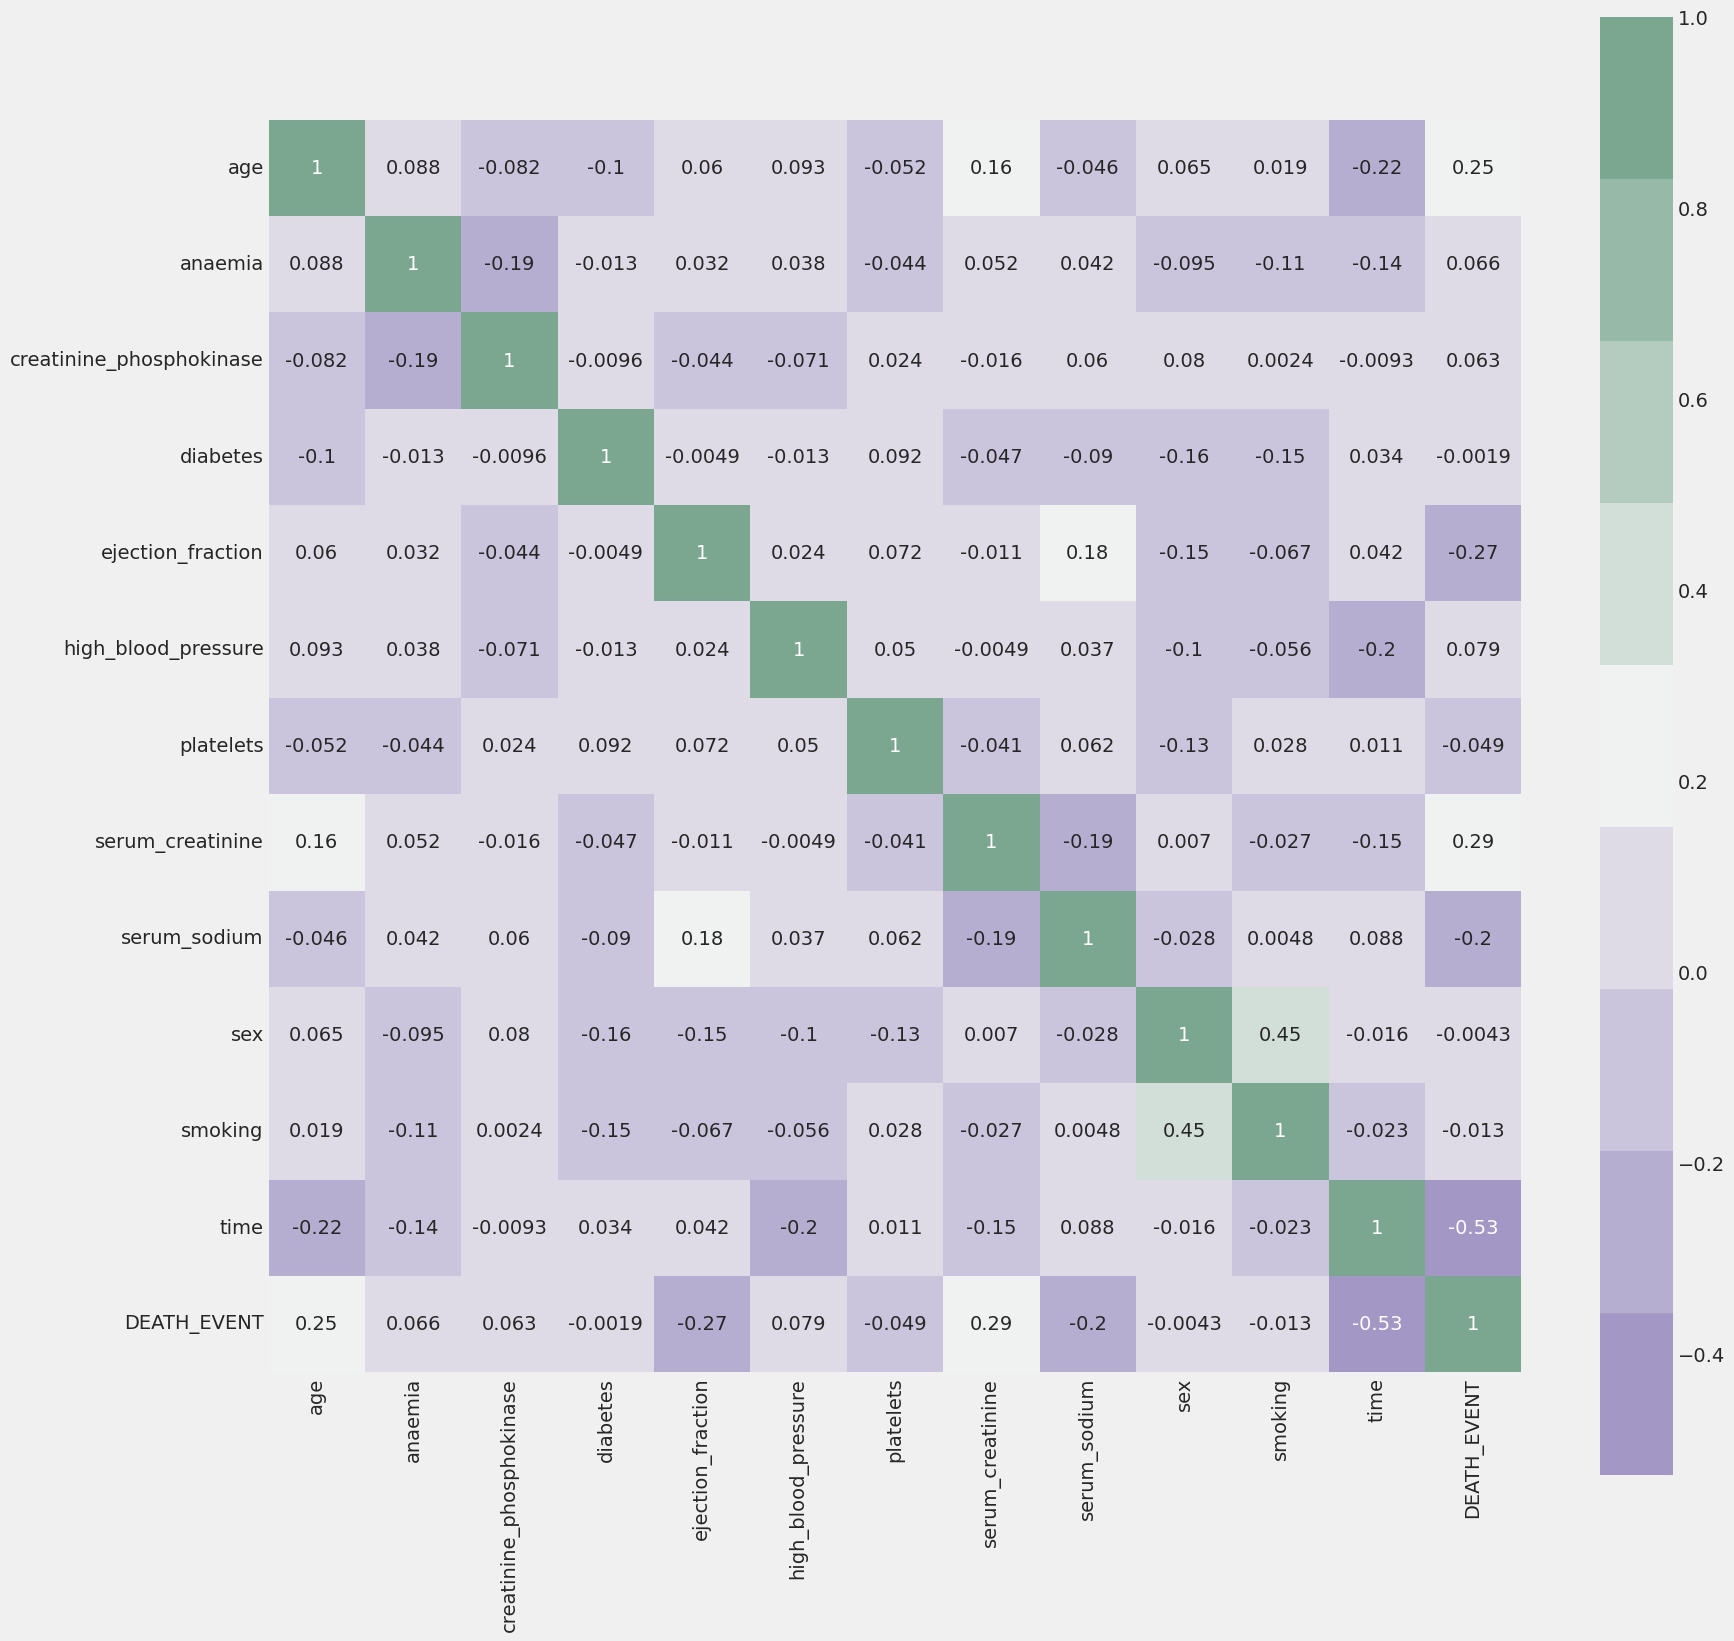

In [ ]:
#Examaning a corelation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

# Idea de proyecto 4 - Predicción de precios Stock market (ingeniero de datos)

Vamos a calcular la probabilidad de precio futuro (precio de cierre)
* Analice los precios de las diferentes empresas que tenemos en la base de datos.
* Revise la correlation de precios entre las empresas y diganos que empresas estan mas relacionadas según la tabla y desde su punto de vistas, si se ajusta a la realidad (mismo sector economico fuerte).  
* Elija algua de las empresas (data_AMZN,data_GOOG,data_APPL,data_MSFT) a la cual le vamos a predecir el valor de cierre. No olvide dividir los datos para entrenamiento 80% y 20% test  (puedes usar train_test_split de sklearn)
* Implemente y pruebe diferentes modelos y discuta los resultados de error de cada uno.
* Saque sus propias conclusiones sobre los resultados y discuta.


## Carga de datos

In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-07,153.699997,154.029999,151.130005,151.600006,150.795120,56182000,APPLE
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.058365,47204800,APPLE
2023-03-09,153.559998,154.539993,150.229996,150.589996,149.790466,53833600,APPLE
2023-03-10,150.210007,150.940002,147.610001,148.500000,147.711548,68572400,APPLE
2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671097,84457100,APPLE
...,...,...,...,...,...,...,...
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-07 to 2024-03-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Grafica de Precio de cierre historico

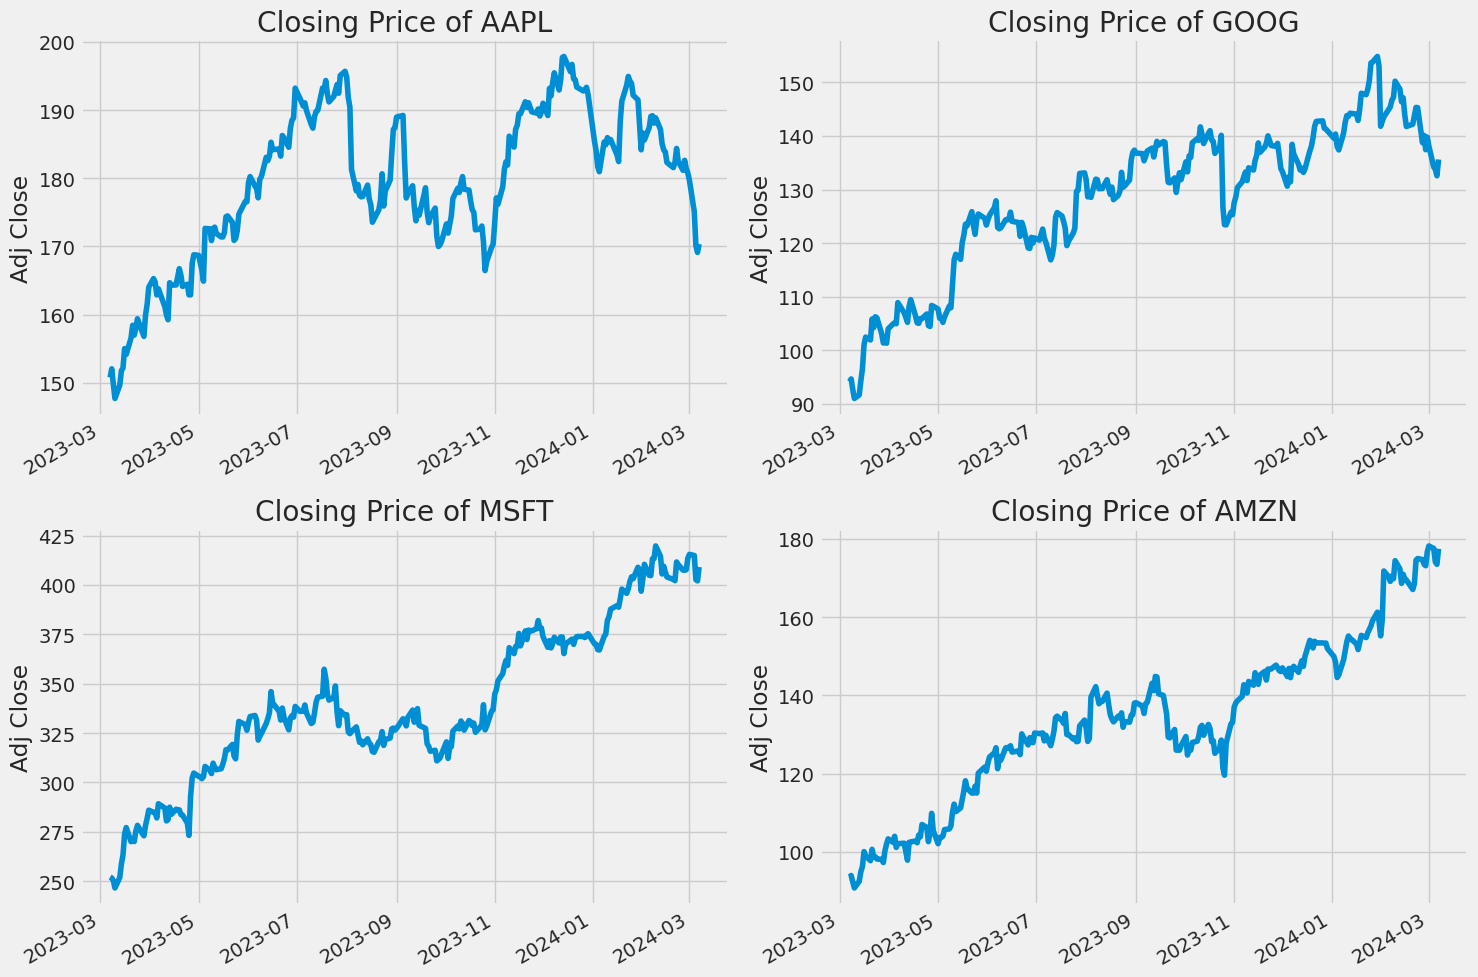

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Graficando la media movil, para cierre de cada empresa, desde los ultimos 10 20 y 50 dias

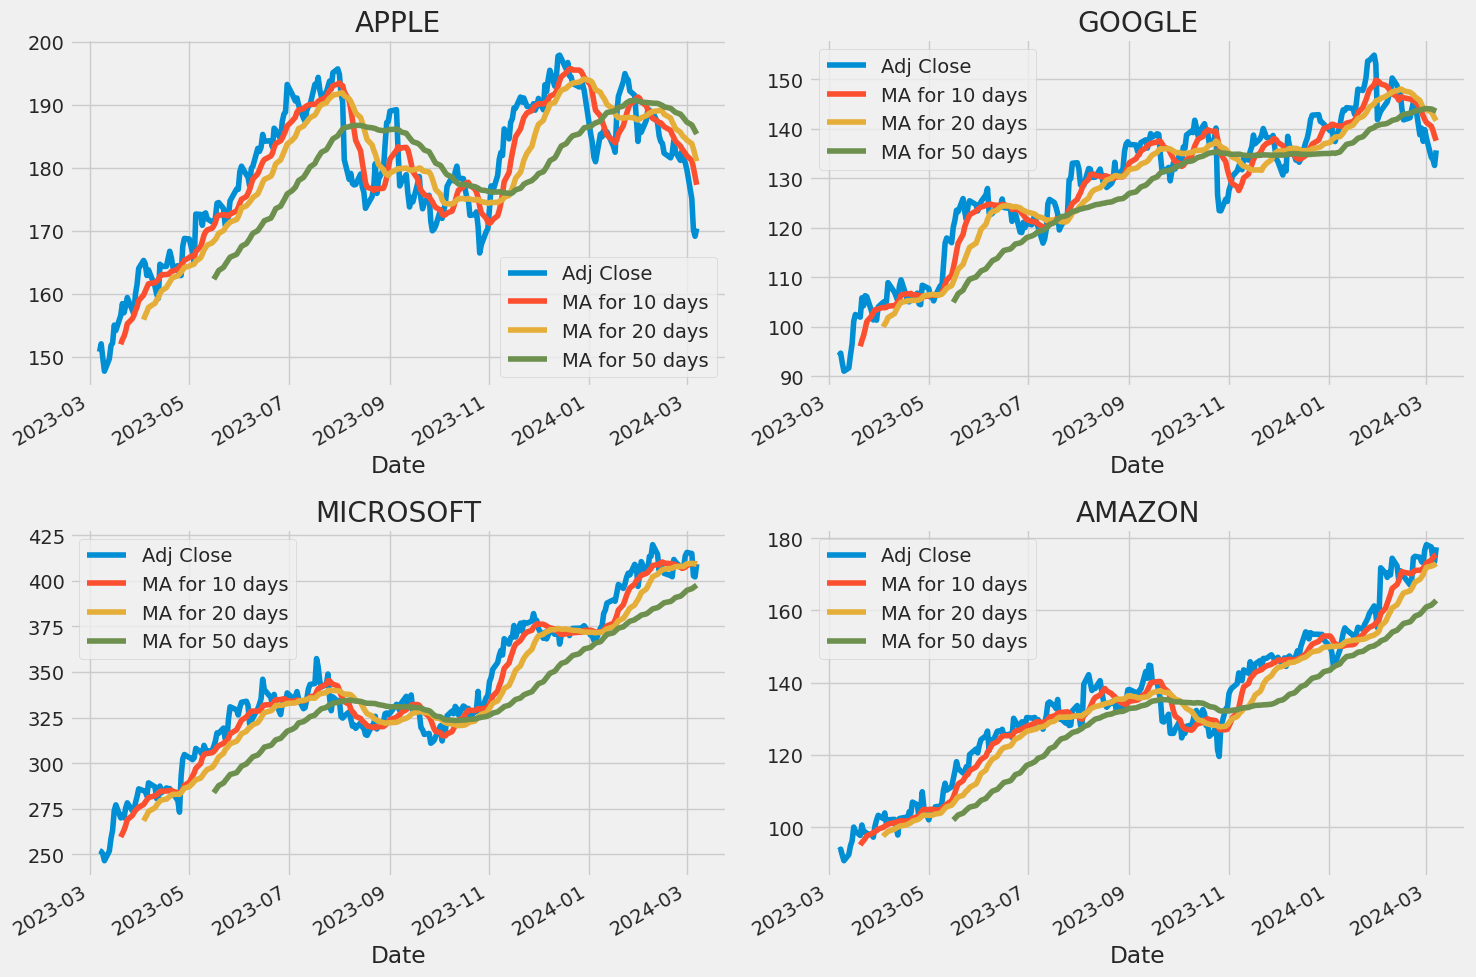

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Correlación entre las empresas

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-07,NaN,NaN,NaN,NaN
2023-03-08,0.008377,0.003955,0.005097,-0.001771
2023-03-09,-0.014915,-0.017781,-0.021025,-0.005439
2023-03-10,-0.013879,-0.016477,-0.017807,-0.014783
2023-03-13,0.013266,0.018737,0.007142,0.021441


Text(0.5, 1.0, 'Correlation of stock closing price')

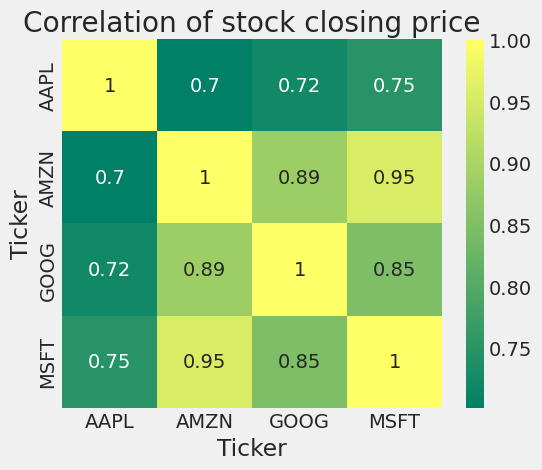

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## Carga de datos para cada empresa Apple, Google, Amazon, Microsoft

In [ ]:
# Get the stock quote
data_APPL = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
data_APPL

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500644,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751302,394024400
...,...,...,...,...,...,...
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400


In [ ]:
# Get the stock quote
data_GOOG = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
data_GOOG

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-03-01,139.610001,140.000000,137.975006,138.080002,138.080002,28522000
2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600


In [ ]:
# Get the stock quote
data_AMZN = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
data_AMZN

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300


In [ ]:
# Get the stock quote
data_MSFT = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
data_MSFT

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238752,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738579,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960726,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301876,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008331,59706800
...,...,...,...,...,...,...
2024-03-01,411.269989,415.869995,410.880005,415.500000,415.500000,17800300
2024-03-04,413.440002,417.350006,412.320007,414.920013,414.920013,17596000
2024-03-05,413.959991,414.250000,400.640015,402.649994,402.649994,26919200


## Ajuste de datos e implementación de predictor

In [ ]:
data_APPL.shape

(3064, 6)

In [ ]:
data_APPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500644,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751302,394024400
...,...,...,...,...,...,...
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400


In [ ]:
Y = np.array(data_APPL)[:,3] #seleccionamos como target el precio close
Y.shape

(3064,)

In [ ]:
print(data_APPL.columns)
X = data_APPL.filter(['Open', 'High', 'Low', 'Adj Close', 'Volume'])  #seleccionamos como datos, t columnas sin close
print(X.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
X= np.array(X)
X.shape

(3064, 5)

In [ ]:
Y.shape

(3064,)

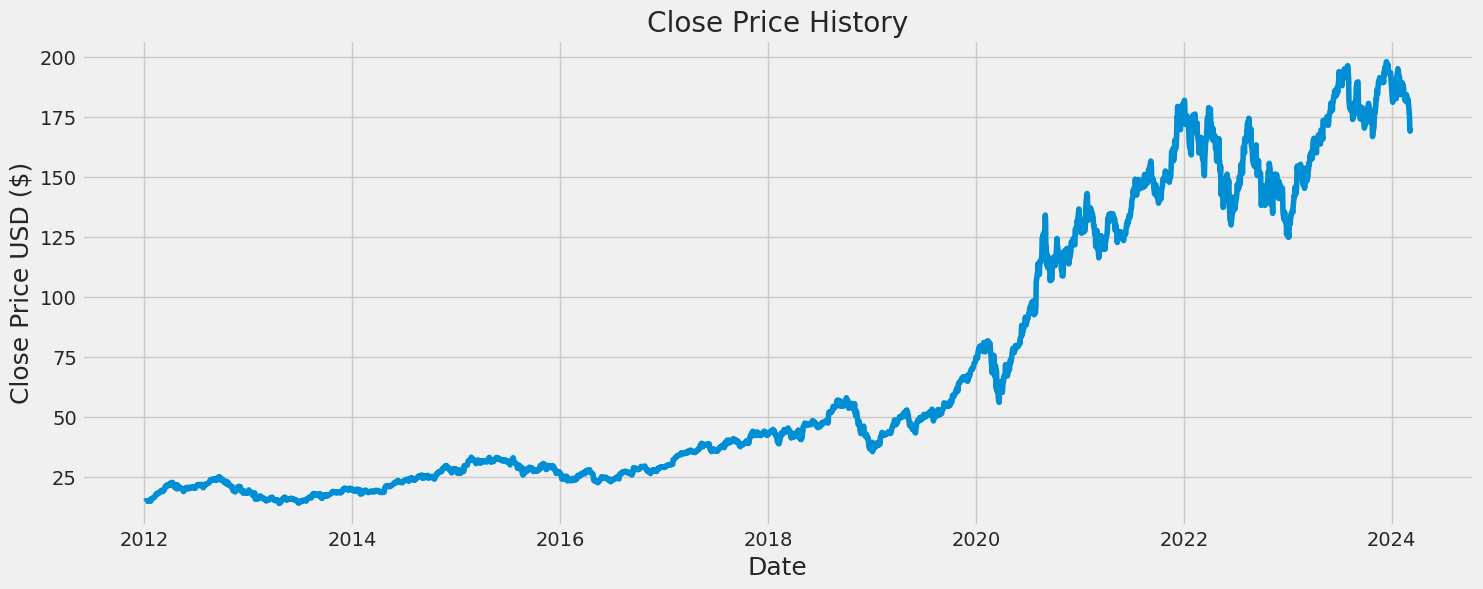

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data_APPL["Close"]) #es la misma Y
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split()